In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tqdm import tqdm as timeloop

%matplotlib inline

In [2]:
sns.set_style('white')

In [3]:
data = pd.read_csv('/Users/shayneufeld/Dropbox/mouse_bandit/markov_full.csv',index_col=0)

In [4]:
data['block_pos_rev'] = data['Block Trial'] - data['Current Block Length']

In [5]:
block_positions = data['Block Trial'].unique()
block_positions = np.append(block_positions, data.block_pos_rev.unique())

conditions = data['Condition'].unique()
df = pd.DataFrame()

for condition in conditions: 
    ps,ph,n,s_s,s_h = [],[],[],[],[]
    d = data[data.Condition == condition]
    
    for bpos in timeloop(block_positions):
        if bpos >= 0:
            d_ = d[d['Block Trial'] == bpos]
        else:
            d_ = d[d.block_pos_rev == bpos]
            
        ps.append(d_.Switch.mean())
        ph.append(d_['Higher p port'].mean())
        
        s_s.append(d_.Switch.std())
        s_h.append(d_['Higher p port'].std())
        
        n.append(d_.shape[0])
    
    df = df.append(pd.DataFrame(data = {'block_pos':block_positions, 
                                  'pswitch':ps,'pswitch_std':s_s,
                                  'phigh':ph,'phigh_std': s_h,
                                  'n':n,'condition':condition}))

100%|██████████| 905/905 [00:02<00:00, 341.91it/s]


In [6]:
df = df.sort_values(by='block_pos',ascending=True)
df = df[((df.block_pos <=100) & (df.block_pos >= -100))]

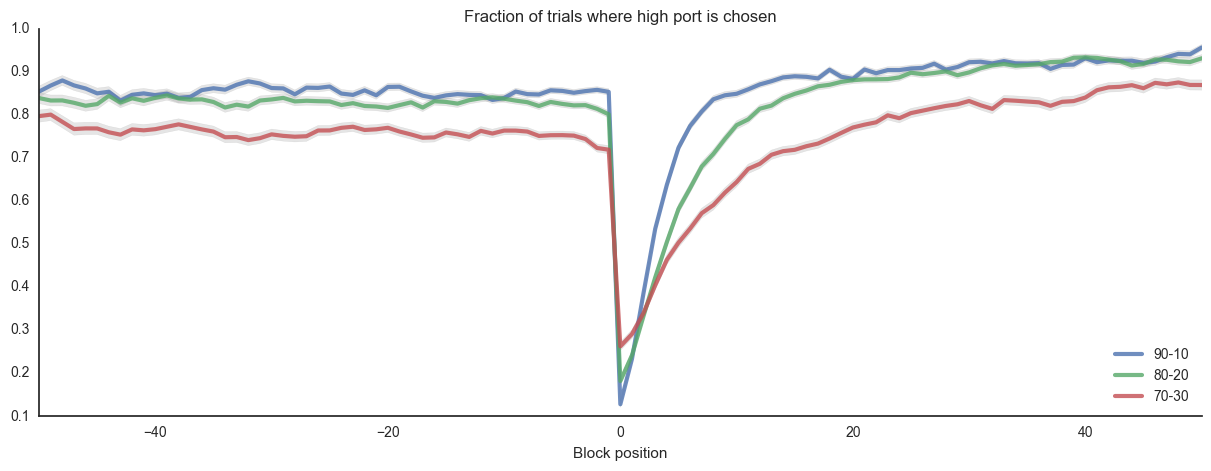

In [7]:
plt.figure(figsize=(15,5))

for condition in df.condition.unique():
    d = df[df.condition == condition]
    plt.fill_between(d.block_pos,y1=d.phigh - d.phigh_std / np.sqrt(d.n), 
                                    y2 =d.phigh + d.phigh_std / np.sqrt(d.n),alpha=0.2,color='grey')
    plt.plot(d.block_pos,d.phigh,'-',label = condition,alpha=0.8,linewidth=3)
    
plt.legend(loc='lower right')
plt.xlim(-50,50)
sns.despine()
plt.title('Fraction of trials where high port is chosen')
plt.xlabel('Block position')

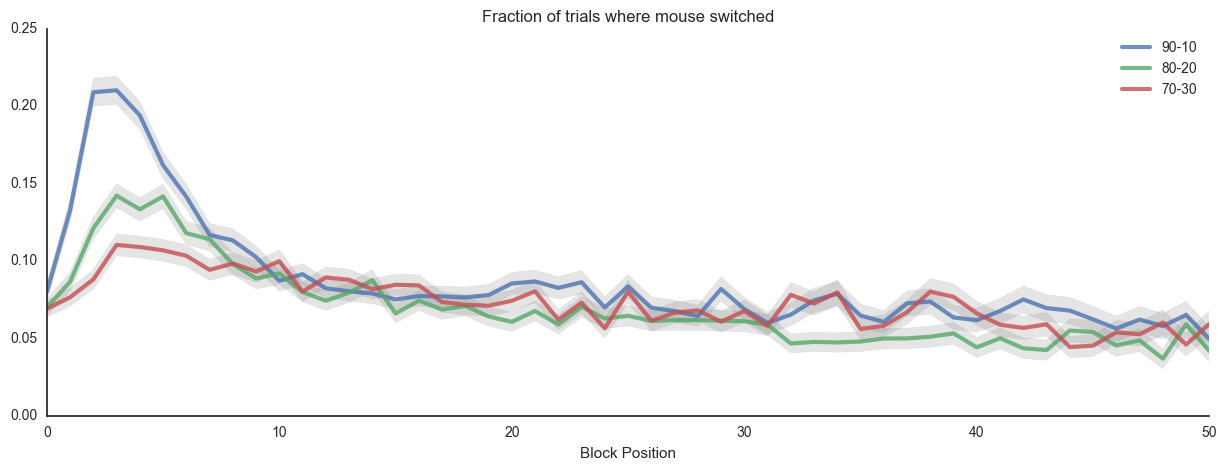

In [8]:
plt.figure(figsize=(15,5))

for condition in df.condition.unique():
    d = df[df.condition == condition]
    plt.fill_between(d.block_pos,y1=d.pswitch - d.pswitch_std / np.sqrt(d.n), 
                                    y2 =d.pswitch + d.pswitch_std / np.sqrt(d.n),alpha=0.2,color='grey')
    plt.plot(d.block_pos,d.pswitch,'-',label = condition,alpha=0.8,linewidth=3)
    
plt.legend()
plt.xlim(0,50)
sns.despine()
plt.title('Fraction of trials where mouse switched')
plt.xlabel('Block Position')

Why does this look different than the graph at the bottom of `p_high_port`?